 # Customer service satisfaction

## ASK


### What is the problem you are trying to solve?

Discover customer service on the agent side and explore how variables can influence the CSAT score.

### The questions to discover are:

What type of channel of communication was received when clients reported issues?

What channel of communication did clients provide the highest CSAT score?

Would the CSAT score be influenced by how long the agent resolved the issue?

How many surveys each category received?

Which agent receives the highest the most amount surveys?

Which Supervisor received the most highest and lowest count surveys in the network?

Which team manager received the most and lowest surveys count in the network?
    
Is there a relationship between the client’s channel of communication and the survey score provided?

What is the highest and lowest average CSAT Score of Agents in the network?

What Shift received the most CSAT Score and what was the average CSAT Score?

## PREPARE

### Where is the data located? 
    https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction/data
    
### How is the Data organized? 

   The data is considered structured data because is organized in a certain format, like rows and columns.
    
### Are there issues with bias or credibility in this data? Does your data ROCCC?

   The authentic information has been altered using the Faker library to ensure the concealment of genuine details.
    
### How did you verify the data’s integrity?
 
 This is public data that you can use to explore customer satisfaction within one month of data. We are going to assume the data is credible.
     

## PROCESS

### Choose your tools

Python libraries are to be used for cleaning, analyzing, and visualization.

In [1]:
import pandas as pd

import numpy as np

import datetime

# Visualization
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df=pd.read_csv('Customer_support_data[1].csv',)
df


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


In [3]:
# Checking data types

df.dtypes

Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object

In [4]:
# Remove columns not required or beyond the scope of project
df.drop(['Sub-category','Customer Remarks','order_date_time','Order_id','Customer_City','Product_category','Item_price','connected_handling_time','Tenure Bucket'], axis = 1, inplace =True) # By including inplace =True, this affect the dataset

In [5]:
# Check the dataset after dropping columns
df.head(5)

,Unique id,channel_name,category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,Morning,5


In [6]:
# Checking for duplicates

df.duplicated()

print('If it shows True, it means there are duplicates, but looking deeper there are none', df.duplicated())

If it shows True, it means there are duplicates, but looking deeper there are none 0        False
1        False
2        False
3        False
4        False
         ...  
85902    False
85903    False
85904    False
85905    False
85906    False
Length: 85907, dtype: bool


In [7]:
## Data Cleaning. 
# Separating rows and creating new columns. I am going to separating Issue reported at because there is time in there that I would need to analysis.

# Showing what is to be separated
df['Issue_reported at'].str.split(' ') 


0        [01/08/2023, 11:13]
1        [01/08/2023, 12:52]
2        [01/08/2023, 20:16]
3        [01/08/2023, 20:56]
4        [01/08/2023, 10:30]
                ...         
85902    [30/08/2023, 23:20]
85903    [31/08/2023, 08:15]
85904    [31/08/2023, 18:57]
85905    [31/08/2023, 19:59]
85906    [31/08/2023, 23:36]
Name: Issue_reported at, Length: 85907, dtype: object

In [8]:
# Now that we know what need to be split, this are the next steps

# If we want to put in a dataframe
df['Issue_reported at'].str.split(' ', expand = True)

#Putting column numbers
df['Issue_reported at'].str.split(' ', n=1, expand = True)

#Adding the new columns into the dataset
df['Issue_reported at'].str.split(' ', n=1, expand = True).rename(columns = {0:'Issue_reported at', 1:'Issue_reported_time'})

,Issue_reported at,Issue_reported_time
0,01/08/2023,11:13
1,01/08/2023,12:52
2,01/08/2023,20:16
3,01/08/2023,20:56
4,01/08/2023,10:30
...,...,...
85902,30/08/2023,23:20
85903,31/08/2023,08:15
85904,31/08/2023,18:57
85905,31/08/2023,19:59


In [9]:
# Lets check the current data
df.head(5)


,Unique id,channel_name,category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,Morning,5


In [10]:
# We need to update so is part of the dataset

df[['Issue_reported at','Issue_reported_time']] = df['Issue_reported at'].str.split(' ', n=1, expand = True)

df.head(5)

,Unique id,channel_name,category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Agent Shift,CSAT Score,Issue_reported_time
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,01/08/2023,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,Morning,5,11:13
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,01/08/2023,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,Morning,5,12:52
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,01/08/2023,01/08/2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,Evening,5,20:16
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,01/08/2023,01/08/2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,Evening,5,20:56
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,01/08/2023,01/08/2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,Morning,5,10:30


In [11]:
# Now we need to rearrange the columns because I want Issue_reported at and Issue_reported_time near to each to not create confusion.

df = df[['Unique id', 'channel_name', 'category', 'Issue_reported at','Issue_reported_time', 'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager', 'Agent Shift','CSAT Score']]

In [12]:
df.head(5)

,Unique id,channel_name,category,Issue_reported at,Issue_reported_time,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,01/08/2023,11:13,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,01/08/2023,12:52,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,01/08/2023,20:16,01/08/2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,01/08/2023,20:56,01/08/2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,01/08/2023,10:30,01/08/2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,Morning,5


In [13]:
# Now I am going to do the same steps with issue_responded column

# Showing what is to be separated
df['issue_responded'].str.split(' ')

# If we want to put in a dataframe
df['issue_responded'].str.split(' ', expand = True)

#Putting column numbers
df['issue_responded'].str.split(' ', n=1, expand = True)

#Adding the new columns into the dataset
df['issue_responded'].str.split(' ', n=1, expand = True).rename(columns = {0:'issue_responded', 1:'issue_responded_time'})

df[['issue_responded','issue_responded_time']] = df['issue_responded'].str.split(' ', n=1, expand = True)

df.head(5)

,Unique id,channel_name,category,Issue_reported at,Issue_reported_time,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Agent Shift,CSAT Score,issue_responded_time
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,01/08/2023,11:13,01/08/2023,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,Morning,5,11:47
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,01/08/2023,12:52,01/08/2023,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,Morning,5,12:54
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,01/08/2023,20:16,01/08/2023,01-Aug-23,Duane Norman,Jackson Park,William Kim,Evening,5,20:38
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,01/08/2023,20:56,01/08/2023,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,Evening,5,21:16
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,01/08/2023,10:30,01/08/2023,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,Morning,5,10:32


In [14]:
# Next step is to rearrange the columns because I want to have near each other that make sense to the reader and then check the dataframe

df = df[['Unique id','channel_name','category','Issue_reported at','Issue_reported_time','issue_responded','issue_responded_time','Survey_response_Date','Agent_name','Supervisor','Manager','Agent Shift','CSAT Score']]

df.head(5)

,Unique id,channel_name,category,Issue_reported at,Issue_reported_time,issue_responded,issue_responded_time,Survey_response_Date,Agent_name,Supervisor,Manager,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,01/08/2023,11:13,01/08/2023,11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,01/08/2023,12:52,01/08/2023,12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,01/08/2023,20:16,01/08/2023,20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,01/08/2023,20:56,01/08/2023,21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,01/08/2023,10:30,01/08/2023,10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,Morning,5


In [15]:
#Changing data type for Issue_reported at and issue_responde to datetime
# Using strftime to make a string represent a time for Issue_reported_time and issue_responded_time 

df["Issue_reported at"] = pd.to_datetime(df["Issue_reported at"], format='mixed')

df["issue_responded"] = pd.to_datetime(df["issue_responded"], format='mixed')


In [16]:
# Using strftime to make a string represent a time for Issue_reported_time and issue_responded_time 

df['Issue_reported_time'] = pd.to_datetime(df['Issue_reported_time'], format = 'mixed')
df['issue_responded_time'] = pd.to_datetime(df['issue_responded_time'], format = 'mixed')

df['Issue_reported_time'] = df['Issue_reported_time'].dt.strftime("%H:%M:%S")
df['issue_responded_time'] = df['issue_responded_time'].dt.strftime("%H:%M:%S")


df.head(5)

,Unique id,channel_name,category,Issue_reported at,Issue_reported_time,issue_responded,issue_responded_time,Survey_response_Date,Agent_name,Supervisor,Manager,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,2023-01-08,11:13:00,2023-01-08,11:47:00,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,2023-01-08,12:52:00,2023-01-08,12:54:00,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,2023-01-08,20:16:00,2023-01-08,20:38:00,01-Aug-23,Duane Norman,Jackson Park,William Kim,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,2023-01-08,20:56:00,2023-01-08,21:16:00,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,2023-01-08,10:30:00,2023-01-08,10:32:00,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,Morning,5


In [17]:
# Checking data types after conversion

df.dtypes

Unique id                       object
channel_name                    object
category                        object
Issue_reported at       datetime64[ns]
Issue_reported_time             object
issue_responded         datetime64[ns]
issue_responded_time            object
Survey_response_Date            object
Agent_name                      object
Supervisor                      object
Manager                         object
Agent Shift                     object
CSAT Score                       int64
dtype: object

In [18]:
# Checking for null values
df.isnull().sum()

print('These show columns are not missing any data', df.isnull().sum())

These show columns are not missing any data Unique id               0
channel_name            0
category                0
Issue_reported at       0
Issue_reported_time     0
issue_responded         0
issue_responded_time    0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Agent Shift             0
CSAT Score              0
dtype: int64


In [19]:
# Checking for Nullvalues. Another method to verify null values

[df[col].isna().any() for col in df.columns]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

### Observation:

False values depict that there are no null or missing values, so we can move forward with the analysis.

## Analyze


In [20]:
# Statistical summary

df.describe(include = "all")

,Unique id,channel_name,category,Issue_reported at,Issue_reported_time,issue_responded,issue_responded_time,Survey_response_Date,Agent_name,Supervisor,Manager,Agent Shift,CSAT Score
count,85907,85907,85907,85907,85907,85907,85907,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,NaN,1400,NaN,1428,31,1371,40,6,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,NaN,11:11:00,NaN,00:00:00,28-Aug-23,Wendy Taylor,Carter Park,John Smith,Morning,NaN
freq,1,68142,44097,NaN,129,NaN,3442,3452,429,4273,25261,41426,NaN
mean,NaN,NaN,NaN,2023-08-03 04:45:23.708196096,NaN,2023-08-03 10:55:08.293852928,NaN,NaN,NaN,NaN,NaN,NaN,4.242157
min,NaN,NaN,NaN,2023-01-08 00:00:00,NaN,2023-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2023-08-13 00:00:00,NaN,2023-08-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,2023-08-21 00:00:00,NaN,2023-08-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,2023-08-28 00:00:00,NaN,2023-08-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
max,NaN,NaN,NaN,2023-12-08 00:00:00,NaN,2023-12-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


### Insights

Inbound is the most frequent object in the channel_name with 68142 representatives receiving calls.

The client's reason for the call was to talk about returns with 44097 of the entries.

The morning shift appears the most in the columns reaching 41426.

The mean CSAT score is 4.242, and the standard deviation is 1.38 from the network in the month of August


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique id             85907 non-null  object        
 1   channel_name          85907 non-null  object        
 2   category              85907 non-null  object        
 3   Issue_reported at     85907 non-null  datetime64[ns]
 4   Issue_reported_time   85907 non-null  object        
 5   issue_responded       85907 non-null  datetime64[ns]
 6   issue_responded_time  85907 non-null  object        
 7   Survey_response_Date  85907 non-null  object        
 8   Agent_name            85907 non-null  object        
 9   Supervisor            85907 non-null  object        
 10  Manager               85907 non-null  object        
 11  Agent Shift           85907 non-null  object        
 12  CSAT Score            85907 non-null  int64         
dtypes: datetime64[ns

In [23]:
# What was the channel of communication used by clients to report issues?

# Count the values within the channel_name.

df['channel_name'].value_counts()


channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

### Observation

On the top of the list, we can see that Agents received more inbound calls from clients to report their issues, and on the bottom of the list with 3023 values was Email.

In [24]:
#How many surveys each category received?
df.groupby('category')['Survey_response_Date'].count().sort_values(ascending=False).reset_index(name='Surveys_per_category')

,category,Surveys_per_category
0,Returns,44097
1,Order Related,23215
2,Refund Related,4550
3,Product Queries,3692
4,Shopzilla Related,2792
5,Payments related,2327
6,Feedback,2294
7,Cancellation,2212
8,Offers & Cashback,480
9,Others,99


### Observation

Representatives receive the most surveys when clients make "returns" with 44097 counts.

In [25]:
#What is the highest and lowest average CSAT Score of Agents in the network?
top_agents=df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).reset_index(name='Average_CSAT Score').head(10)

bottom_agents=df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).reset_index(name='Average_CSAT Score').tail(10)

print(top_agents)

print(bottom_agents)

           Agent_name  Average_CSAT Score
0     Pamela Robinson            4.956522
1       Virginia Lane            4.909910
2            Sean Gay            4.909091
3       Taylor Nelson            4.888889
4         Nancy Singh            4.868421
5        Anthony Sims            4.868421
6        Morgan Smith            4.866667
7        John Hoffman            4.861111
8        Kelly Thomas            4.857143
9  Nicole Simpson DVM            4.850000
              Agent_name  Average_CSAT Score
1361   Veronica Anderson            2.542857
1362        Tommy Davies            2.416667
1363        Pamela Perez            2.382353
1364        Wesley Meyer            2.259259
1365     Charles Morales            2.205882
1366       Nicole Zavala            2.133333
1367  Virginia Mccormick            2.114286
1368     Curtis Mccarthy            2.100000
1369      Rebecca Miller            1.954545
1370       Philip Harmon            1.809524


### Observation

Pamela Robinson has an average CSAT Score 4.96 and Philip Harmon has an CSAT Score of 1.81.

In [26]:
# Which agent receive the highest the most amount survey?
df.groupby('Agent_name')['Survey_response_Date'].count().sort_values(ascending=False).reset_index(name='Surveys_Count')

,Agent_name,Surveys_Count
0,Wendy Taylor,429
1,Timothy Huff,265
2,David Smith,264
3,Jamie Smith,253
4,Kayla Wilson,216
...,...,...
1366,Terri Lopez,20
1367,Nicole Simpson DVM,20
1368,Christopher Roberson,20
1369,Samantha Harmon,20


### Observation

Based on this observation we can see Wendy Taylor on the top of the list in receiving the most surveys. 

In [27]:
# Which Supervisor received the most and lowest surveys in the network?
df.groupby('Supervisor')['Survey_response_Date'].count().sort_values(ascending=False).reset_index(name='Surveys_Count')

,Supervisor,Surveys_Count
0,Carter Park,4273
1,Elijah Yamaguchi,3855
2,Zoe Yamamoto,3551
3,Nathan Patel,3549
4,Noah Patel,3434
5,Ava Wong,3373
6,Emma Park,3290
7,Mia Patel,3279
8,Evelyn Kimura,2974
9,Aiden Patel,2892


### Observation

Based on this observation, we can see the Carter Park team on the top of the list in receiving the most surveys and Sophia Chen making the supervisor team with the fewer surveys.

In [61]:
#Which Manager received the most highest and lowest count surveys in the network?

df.groupby('Manager')['Survey_response_Date'].count().sort_values(ascending=False).reset_index(name='Surveys_Count')

,Manager,Surveys_Count
0,John Smith,25261
1,Michael Lee,17600
2,Jennifer Nguyen,15897
3,Emily Chen,14062
4,William Kim,8568
5,Olivia Tan,4519


### Observation

Based on this observation we can see John Smith on the top of the list in receiving the most surveys and Olivia Tan making the supervisor with less surveys.

In [22]:
# What Shift received the most CSAT Score and what was the average CSAT Score?

df.groupby('Agent Shift')['CSAT Score'].mean().sort_values(ascending=False).reset_index(name='Average_CSAT Score')

,Agent Shift,Average_CSAT Score
0,Split,4.427357
1,Afternoon,4.292295
2,Night,4.288754
3,Evening,4.276361
4,Morning,4.189495


### Observation

The split shift received the highest average CSAT Score.

In [23]:
# What Shift received the most CSAT Score and what was the average CSAT Score?
df.groupby('Agent Shift')['CSAT Score'].count().sort_values(ascending=False).reset_index(name='CSAT Score_Received')

,Agent Shift,CSAT Score_Received
0,Morning,41426
1,Evening,33677
2,Afternoon,5840
3,Split,3648
4,Night,1316


### Observation

The morning shift received most of the client's scores by 41426, and the Nightshift made the least amount of clients scoring representatives.


## Visualization

C:\Users\luisp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


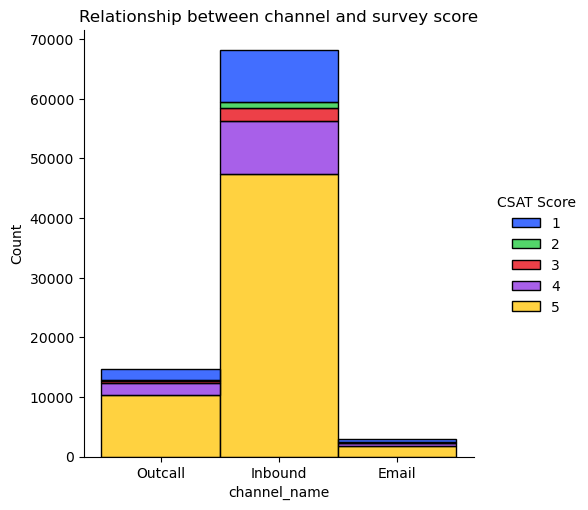

In [27]:
# Is there a relationship between client’s channel of communication and the survey score provided

df2=sns.displot(data= df, x='channel_name', hue ='CSAT Score', palette='bright6', multiple="stack")
plt.title("Relationship between channel and survey score")
plt.show()

### Observation

Representatives received clients' survey scores when clients called the company. In the second place, Outcall and Email the bottom of the list. Representatives receiving the most number of CSAT Score will come from inbound calls.

<Axes: title={'center': 'Surveys_per_category'}, ylabel='category'>

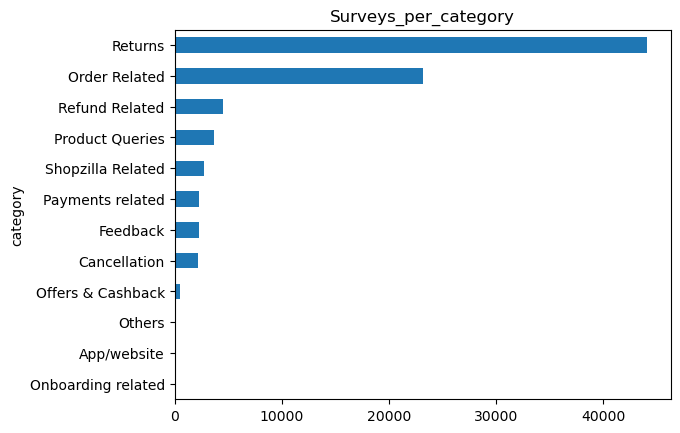

In [32]:
##How many surveys each category received?-Visualize
df.groupby('category')['Survey_response_Date'].count().sort_values(ascending=True).plot(kind="barh", title="Surveys_per_category")

C:\Users\luisp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'CSAT Scores received by Shift')

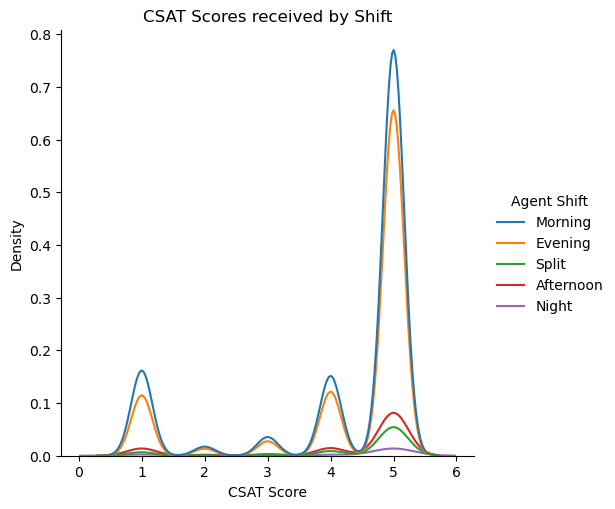

In [29]:
sns.displot(data=df,x='CSAT Score', hue='Agent Shift', kind='kde')
plt.title("CSAT Scores received by Shift")


### Observation

The Morning shift received the highest and lowest CSAT score from clients.

## ACT

### Conclusion and findings

After analyzing the data, it was found that inbound calls consistently receive the highest survey scores and are the preferred channel of communication for clients. Additionally, providing clients with a resolution to their inquiries during the first contact can greatly impact their review of the service, so it is crucial to prepare representatives with adequate resources to handle client inquiries effectively.

Based on the data provided clients will provide surveys when they are calling to return. The category of returns can show many variables of why the increase of returns, so to understand clients' reason for returning, we will ask representative to gather further information to reduce returns in the future.

Providing excellent customer service is essential in any customer base. So, it is essential to reward such representatives for receiving high CSAT scores from clients. Furthermore, Managers should work with the Supervisor and Team to reward accordingly and create time for those exceeding representatives in helping others to provide great customer service.

The Split Shift received the highest average CSAT Score, but we can see that the Split Shift received a 3648 CSAT Score. On the other hand, the morning shift received the most survey scores, and the bottom of the average CSAT Score as well. Furthermore, looking at the chart, we can see that the morning shift received the top most scores (five), but the most bottom scores (one). Finally, data show that the CSAT Score can make an impact on the average CSAT Score received from clients. 

### Additional data to use and expand in the future

Calculating time can provide us insights and assist both clients and representatives.

Comparing the Tenure Bucket to CSAT Score and other variables can provide insights.


## Reference Page

[Stackoverflow](https://stackoverflow.com/)

[W3schools-Pandas](https://www.w3schools.com/python/pandas/default.asp)

[Kaggle-Dataset](https://www.kaggle.com/code/ddosad/customer-service-satisfaction-analysis)

[Pandas-groupby](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html)

[seaborn-visualization](https://seaborn.pydata.org/tutorial/introduction.html)


## Contact Page
[LinkedIn](https://www.linkedin.com/in/luis-prieto-uzcategui/)